In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from NestedCV import NestedCV

In [3]:
# Set default sizes for figures.
plt.style.use("default") # style matplotlib
plt.rc("axes", labelsize = 15) # fontsize of the x and y labels
plt.rc("axes", titlesize = 15) # fontsize of the axes title
plt.rc("xtick", labelsize = 15) # fontsize of the tick labels
plt.rc("ytick", labelsize = 15) # fontsize of the tick labels
plt.rc("legend", fontsize = 13) # legend fontsize

In [4]:
# Time-series.
np.random.seed(42)
data = np.random.rand(150, 3) 

df = pd.DataFrame(data, index = pd.date_range("2018-08-22", periods = data.shape[0]), columns = ["A", "B", "C"])
print(f"Start date: {df.index[0].date()} -- End date: {df.index[-1].date()}")
df.head()

Start date: 2018-08-22 -- End date: 2019-01-18


,A,B,C
2018-08-22,0.374540,0.950714,0.731994
2018-08-23,0.598658,0.156019,0.155995
2018-08-24,0.058084,0.866176,0.601115
2018-08-25,0.708073,0.020584,0.969910
2018-08-26,0.832443,0.212339,0.181825


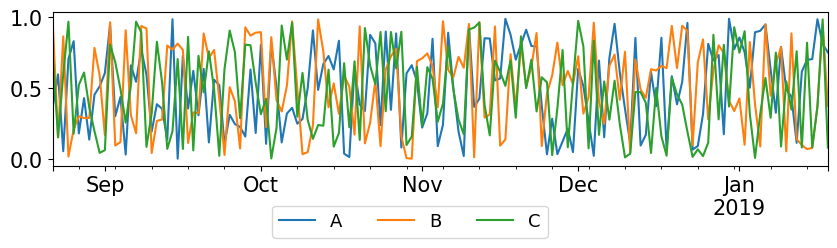

In [5]:
fig, ax = plt.subplots(figsize = (10, 2))

df.plot(ax = ax)
plt.legend(bbox_to_anchor = (0.65, -0.2), ncol = 3);

In [6]:
# Create the nested cross validation.
cv = NestedCV(n_splits = 3, test_size = 30)
# Total nested cross validation.
SPLITS = cv.get_splits(df)

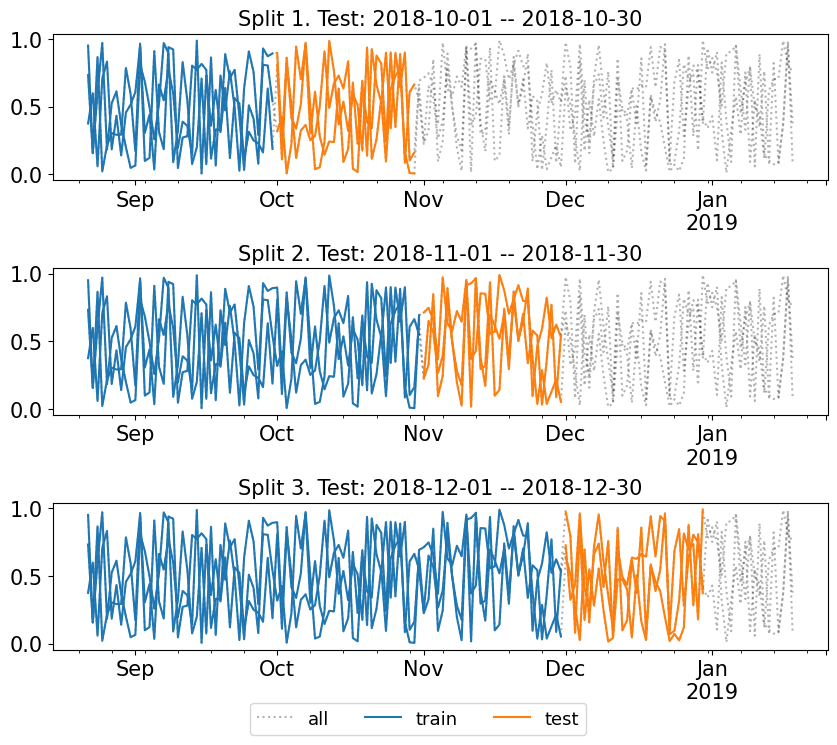

In [7]:
fig, axs = plt.subplots(nrows = len(SPLITS), ncols = 1, figsize = (10, 8))    
fig.subplots_adjust(hspace = .6)

colors = ["black", sns.color_palette("tab10")[0], sns.color_palette("tab10")[1]]

for i, (split_number, (train, test)) in enumerate(SPLITS.items()):
    for column in df.columns: 
        df[column].plot(ax = axs[i], label = "_", style = ":", c = colors[0], alpha = 0.3)
        train[column].plot(ax = axs[i], label = "train", style = "-", c = colors[1], legend = False)
        test[column].plot(ax = axs[i], label = "test", style = "-", c = colors[2], legend = False)
    
    # Set axis names.
    axs[i].set_title(f"Split {split_number}. Test: {test.index[0].date()} -- {test.index[-1].date()}")
    axs[i].set_ylabel("")
    axs[i].set_xlabel("")
    axs[i].autoscale()
    
# Legend.
leg = plt.legend(["all", "train", "test"], bbox_to_anchor = (0.7, -0.3), ncol = 3)
for i, j in enumerate(leg.legendHandles):
    j.set_color(colors[i])    

In [8]:
train

,A,B,C
2018-08-22,0.374540,0.950714,0.731994
2018-08-23,0.598658,0.156019,0.155995
2018-08-24,0.058084,0.866176,0.601115
2018-08-25,0.708073,0.020584,0.969910
2018-08-26,0.832443,0.212339,0.181825
...,...,...,...
2018-11-26,0.286541,0.590833,0.030500
2018-11-27,0.037348,0.822601,0.360191
2018-11-28,0.127061,0.522243,0.769994
2018-11-29,0.215821,0.622890,0.085347


In [9]:
test

,A,B,C
2018-12-01,0.637430,0.726091,0.975852
2018-12-02,0.516300,0.322956,0.795186
2018-12-03,0.270832,0.438971,0.078456
2018-12-04,0.025351,0.962648,0.835980
2018-12-05,0.695974,0.408953,0.173294
2018-12-06,0.156437,0.250243,0.549227
2018-12-07,0.714596,0.660197,0.279934
2018-12-08,0.954865,0.737897,0.554354
2018-12-09,0.611721,0.419600,0.247731
2018-12-10,0.355973,0.757846,0.014393
